### 텍스트 분석
- 트위터 데이터를 통한 형태소 분석 진행
- 평점이 있는 데이터로 진행

In [1]:
import pandas as pd

In [2]:
survey = pd.read_csv("survey_설문지.csv")

In [3]:
survey

,datetime,comment,satisfaction
0,2019-03-11,역앞에 젊은이들이 모여있다(AA역),1
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5
2,2019-02-18,육아 지원이 좋다,5
3,2019-04-09,어린이집에 바로 입원할 수 있다(대기아동 없음),4
4,2019-01-06,역앞 상가가 쓸쓸하다,2
...,...,...,...
81,2019-01-21,초등학교 운동장이 잔디밭이라서 아주 좋다,5
82,2019-04-30,홈페이지에서도 설문지를 투고할 수 있게 해 달라,2
83,2019-01-09,공원에 놀이기구가 너무 적다,1
84,2019-03-09,공원을 더 늘렸으면 좋겠다,2


In [4]:
survey.isna().sum() # 결측치 존재함

datetime        0
comment         2
satisfaction    0
dtype: int64

In [5]:
survey = survey.dropna() # 결측치가 있는 데이터는 삭제

In [6]:
survey.comment.value_counts().to_frame()

,comment
역앞에 젊은이들이 모여있다(AA역),1
"최근 지방 넘버의 차가 많다, 치안은 제대로 되어 있는가?",1
앙케이트를 제대로 확인하고 거리조성에 반영해주고 있는 자세가 좋다.,1
시장이 젊고 활기가 있다,1
"옆동네에 생긴 쓰레기 처리시설이 걱정, 공해는 괜찮나?",1
...,...
시내 접근성이 좋다,1
길이 깨끗하다,1
육아하기에는 최고,1
관광 명소가 없다,1


In [7]:
survey["comment"] = survey["comment"].str.replace("AA", "")

C:\Users\doram\AppData\Local\Temp\ipykernel_21896\1484056326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey["comment"] = survey["comment"].str.replace("AA", "")


In [8]:
survey["comment"] = survey["comment"].str.replace("\(.+?\)", "")

C:\Users\doram\AppData\Local\Temp\ipykernel_21896\4006902280.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  survey["comment"] = survey["comment"].str.replace("\(.+?\)", "")
C:\Users\doram\AppData\Local\Temp\ipykernel_21896\4006902280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey["comment"] = survey["comment"].str.replace("\(.+?\)", "")


In [9]:
survey

,datetime,comment,satisfaction
0,2019-03-11,역앞에 젊은이들이 모여있다,1
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5
2,2019-02-18,육아 지원이 좋다,5
3,2019-04-09,어린이집에 바로 입원할 수 있다,4
4,2019-01-06,역앞 상가가 쓸쓸하다,2
...,...,...,...
81,2019-01-21,초등학교 운동장이 잔디밭이라서 아주 좋다,5
82,2019-04-30,홈페이지에서도 설문지를 투고할 수 있게 해 달라,2
83,2019-01-09,공원에 놀이기구가 너무 적다,1
84,2019-03-09,공원을 더 늘렸으면 좋겠다,2


In [10]:
# 문자열 길이
survey["length"] = survey["comment"].str.len()

C:\Users\doram\AppData\Local\Temp\ipykernel_21896\3061086570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey["length"] = survey["comment"].str.len()


In [11]:
survey

,datetime,comment,satisfaction,length
0,2019-03-11,역앞에 젊은이들이 모여있다,1,14
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5,21
2,2019-02-18,육아 지원이 좋다,5,9
3,2019-04-09,어린이집에 바로 입원할 수 있다,4,17
4,2019-01-06,역앞 상가가 쓸쓸하다,2,11
...,...,...,...,...
81,2019-01-21,초등학교 운동장이 잔디밭이라서 아주 좋다,5,22
82,2019-04-30,홈페이지에서도 설문지를 투고할 수 있게 해 달라,2,26
83,2019-01-09,공원에 놀이기구가 너무 적다,1,15
84,2019-03-09,공원을 더 늘렸으면 좋겠다,2,14


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([20., 19., 20., 10.,  7.,  3.,  3.,  1.,  0.,  1.]),
 array([ 6. , 11.6, 17.2, 22.8, 28.4, 34. , 39.6, 45.2, 50.8, 56.4, 62. ]),
 <BarContainer object of 10 artists>)

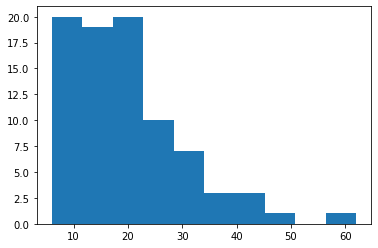

In [13]:
plt.hist(survey["length"])

In [14]:
survey.describe()

,satisfaction,length
count,84.000000,84.000000
mean,2.619048,19.880952
std,1.463654,10.422872
min,1.000000,6.000000
25%,1.000000,12.000000
50%,2.000000,19.000000
75%,4.000000,24.000000
max,5.000000,62.000000


In [15]:
survey

,datetime,comment,satisfaction,length
0,2019-03-11,역앞에 젊은이들이 모여있다,1,14
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5,21
2,2019-02-18,육아 지원이 좋다,5,9
3,2019-04-09,어린이집에 바로 입원할 수 있다,4,17
4,2019-01-06,역앞 상가가 쓸쓸하다,2,11
...,...,...,...,...
81,2019-01-21,초등학교 운동장이 잔디밭이라서 아주 좋다,5,22
82,2019-04-30,홈페이지에서도 설문지를 투고할 수 있게 해 달라,2,26
83,2019-01-09,공원에 놀이기구가 너무 적다,1,15
84,2019-03-09,공원을 더 늘렸으면 좋겠다,2,14


In [16]:
# 형태소 분석 진행
import jpype
from konlpy.tag import Twitter

In [17]:
twt = Twitter()

C:\Users\doram\AppData\Roaming\Python\Python39\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [18]:
text = "여러분 오늘 정말 과제 수고하셨어요! 너무 뛰어난 과제 퀄리티라 놀랐습니다! 파이팅"
tagging = twt.pos(text)

In [19]:
tagging

[('여러분', 'Noun'),
 ('오늘', 'Noun'),
 ('정말', 'Noun'),
 ('과제', 'Noun'),
 ('수고', 'Noun'),
 ('하셨어요', 'Verb'),
 ('!', 'Punctuation'),
 ('너무', 'Adverb'),
 ('뛰어난', 'Adjective'),
 ('과제', 'Noun'),
 ('퀄리티', 'Noun'),
 ('라', 'Josa'),
 ('놀랐습니다', 'Verb'),
 ('!', 'Punctuation'),
 ('파이팅', 'Noun')]

In [20]:
all_words = []
parts = ["Noun"]
for n in range(len(survey)):
    text = survey["comment"].iloc[n] # comment 리뷰를 가지고 온다
    words = twt.pos(text)
    words_arr = []
    for i in words:
        if i == "EOS" or i == "": continue
        word_tmp = i[0]
        part = i[1]
        if not (part in parts): continue
        words_arr.append(word_tmp)
    all_words.extend(words_arr)
print(all_words)

['역앞', '젊은이', '운동', '수', '장소', '것', '육아', '지원이', '어린이집', '바로', '입원', '수', '역앞', '상가', '생활', '놀', '장소', '놀', '장소', '상업시설', '좀', '더', '병원', '사이클링', '코스', '축제', '좀', '더', '성대', '초등학교', '공원', '더', '근처', '공원', '살기', '슈퍼', '육아', '데이트', '명소', '상가', '좀', '더', '밤길', '쓰레기', '처리', '영화관', '가로수', '더', '공원', '추가', '관광', '명소', '육아', '최고', '길이', '시내', '접근성', '집세', '합리', '의', '교통', '체증', '게', '해', '상가', '지붕', '비', '큰일', '상가', '더', '카페', '스포츠', '센터', '자주', '이용', '스포츠', '센터', '이용', '요금', '워킹맘', '지원', '더', '버스', '별로', '안', '자전거', '달리기', '달리기', '운동', '수', '장소', '기업', '역앞', '주차장', '아저씨', '말', '적', '경찰', '순찰', '더', '소방', '활동', '수', '재난', '시', '피난', '장소', '것', '요즘', '강', '범람', '피해', '크게', '이', '도시', '범람', '방지', '취하', '설명', '신호등', '사거리', '때문', '사고', '신호', '상가', '활성화', '활동', '좀더', '행정', '뒷받침', '아이', '놀', '장소', '역앞', '자전거', '주차장', '가로수', '낙엽', '청소', '가로수', '재해', '시', '비축', '상황', '보도', '길이', '수', '지역', '자치', '단체', '더', '지원', '자치', '단체', '활동', '안심', '살', '수', '관광지', '최근', '지방', '넘버', '치안', '제대로', '주차장', '수가', '요금'

In [21]:
all_words_df = pd.DataFrame({"words":all_words, "count":len(all_words)*[1]})

In [22]:
all_words_df

,words,count
0,역앞,1
1,젊은이,1
2,운동,1
3,수,1
4,장소,1
...,...,...
278,놀이기구,1
279,공원,1
280,더,1
281,역앞,1


In [23]:
all_words_df.groupby("words").sum()

,count
words,
가로수,3
강,1
거리,1
걱정,1
걸,1
...,...
확인,1
확장,1
활기,1


In [24]:
all_words_df = all_words_df.groupby("words").sum()

In [25]:
all_words_df.sort_values("count", ascending=False)

,count
words,
더,14
수,7
장소,6
주차장,5
좀,5
...,...
상황,1
생각,1
생활,1


In [26]:
stop_words = ["더","수","좀"]
all_words = []
parts = ["Noun"]
satisfaction = []
for n in range(len(survey)):
    text = survey["comment"].iloc[n] # comment 리뷰를 가지고 온다
    words = twt.pos(text)
    words_arr = []
    for i in words:
        if i == "EOS" or i == "": continue
        word_tmp = i[0]
        part = i[1]
        if not (part in parts): continue
        if word_tmp in stop_words: continue
        words_arr.append(word_tmp)
        satisfaction.append(survey["satisfaction"].iloc[n])
    all_words.extend(words_arr)
print(all_words)

['역앞', '젊은이', '운동', '장소', '것', '육아', '지원이', '어린이집', '바로', '입원', '역앞', '상가', '생활', '놀', '장소', '놀', '장소', '상업시설', '병원', '사이클링', '코스', '축제', '성대', '초등학교', '공원', '근처', '공원', '살기', '슈퍼', '육아', '데이트', '명소', '상가', '밤길', '쓰레기', '처리', '영화관', '가로수', '공원', '추가', '관광', '명소', '육아', '최고', '길이', '시내', '접근성', '집세', '합리', '의', '교통', '체증', '게', '해', '상가', '지붕', '비', '큰일', '상가', '카페', '스포츠', '센터', '자주', '이용', '스포츠', '센터', '이용', '요금', '워킹맘', '지원', '버스', '별로', '안', '자전거', '달리기', '달리기', '운동', '장소', '기업', '역앞', '주차장', '아저씨', '말', '적', '경찰', '순찰', '소방', '활동', '재난', '시', '피난', '장소', '것', '요즘', '강', '범람', '피해', '크게', '이', '도시', '범람', '방지', '취하', '설명', '신호등', '사거리', '때문', '사고', '신호', '상가', '활성화', '활동', '좀더', '행정', '뒷받침', '아이', '놀', '장소', '역앞', '자전거', '주차장', '가로수', '낙엽', '청소', '가로수', '재해', '시', '비축', '상황', '보도', '길이', '지역', '자치', '단체', '지원', '자치', '단체', '활동', '안심', '살', '관광지', '최근', '지방', '넘버', '치안', '제대로', '주차장', '수가', '요금', '역', '앞', '공공', '주차장', '보행자', '용', '신호', '노인', '어린이', '생각', '설정', '급행', '시내', '버스', '노선'

In [27]:
all_words_df = pd.DataFrame({"words":all_words, "satisfaction":satisfaction, 
                             "count":len(all_words)*[1]})

In [28]:
all_words_df

,words,satisfaction,count
0,역앞,1,1
1,젊은이,1,1
2,운동,5,1
3,장소,5,1
4,것,5,1
...,...,...,...
252,공원,1,1
253,놀이기구,1,1
254,공원,2,1
255,역앞,1,1


In [29]:
all_words_df.groupby("words").sum()["satisfaction"]

words
가로수     5
강       3
거리      5
걱정      2
걸       2
       ..
확인      5
확장      1
활기      4
활동     10
활성화     1
Name: satisfaction, Length: 184, dtype: int64

In [30]:
words_satisfaction = all_words_df.groupby("words").mean()["satisfaction"]
words_count = all_words_df.groupby("words").sum()["count"]
words_df = pd.concat([words_satisfaction, words_count], axis=1)

In [31]:
words_df

,satisfaction,count
words,,
가로수,1.666667,3
강,3.000000,1
거리,5.000000,1
걱정,2.000000,1
걸,2.000000,1
...,...,...
확인,5.000000,1
확장,1.000000,1
활기,4.000000,1


In [32]:
# 만족도 점수를 기준으로 빈도가 3개 이상
words_df = words_df.loc[words_df["count"] >= 3]

In [33]:
words_df.sort_values("satisfaction", ascending=False)

,satisfaction,count
words,,
육아,4.333333,3
관공서,3.500000,4
길이,3.500000,4
활동,3.333333,3
장소,3.000000,6
시,2.750000,4
처리,2.333333,3
공원,2.200000,5
상가,2.200000,5


In [34]:
parts = ["Noun"]
all_words_df = pd.DataFrame()
satisfaction = []
for n in range(len(survey)):
    text = survey["comment"].iloc[n]
    words = twt.pos(text)
    words_df = pd.DataFrame()
    for i in words:
        if i == "EOS" or i == "": continue
        word_tmp = i[0]
        part = i[1]
        if not (part in parts): continue
        words_df[word_tmp] = [1]
    all_words_df = pd.concat([all_words_df, words_df], ignore_index=False)
all_words_df.head()

,역앞,젊은이,운동,수,장소,것,육아,지원이,어린이집,바로,...,걸,야간,불안,고령자,운동장,잔디밭,아주,설문지,투고,놀이기구
0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
all_words_df = all_words_df.fillna(0)
all_words_df

,역앞,젊은이,운동,수,장소,것,육아,지원이,어린이집,바로,...,걸,야간,불안,고령자,운동장,잔디밭,아주,설문지,투고,놀이기구
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
all_words

['역앞',
 '젊은이',
 '운동',
 '장소',
 '것',
 '육아',
 '지원이',
 '어린이집',
 '바로',
 '입원',
 '역앞',
 '상가',
 '생활',
 '놀',
 '장소',
 '놀',
 '장소',
 '상업시설',
 '병원',
 '사이클링',
 '코스',
 '축제',
 '성대',
 '초등학교',
 '공원',
 '근처',
 '공원',
 '살기',
 '슈퍼',
 '육아',
 '데이트',
 '명소',
 '상가',
 '밤길',
 '쓰레기',
 '처리',
 '영화관',
 '가로수',
 '공원',
 '추가',
 '관광',
 '명소',
 '육아',
 '최고',
 '길이',
 '시내',
 '접근성',
 '집세',
 '합리',
 '의',
 '교통',
 '체증',
 '게',
 '해',
 '상가',
 '지붕',
 '비',
 '큰일',
 '상가',
 '카페',
 '스포츠',
 '센터',
 '자주',
 '이용',
 '스포츠',
 '센터',
 '이용',
 '요금',
 '워킹맘',
 '지원',
 '버스',
 '별로',
 '안',
 '자전거',
 '달리기',
 '달리기',
 '운동',
 '장소',
 '기업',
 '역앞',
 '주차장',
 '아저씨',
 '말',
 '적',
 '경찰',
 '순찰',
 '소방',
 '활동',
 '재난',
 '시',
 '피난',
 '장소',
 '것',
 '요즘',
 '강',
 '범람',
 '피해',
 '크게',
 '이',
 '도시',
 '범람',
 '방지',
 '취하',
 '설명',
 '신호등',
 '사거리',
 '때문',
 '사고',
 '신호',
 '상가',
 '활성화',
 '활동',
 '좀더',
 '행정',
 '뒷받침',
 '아이',
 '놀',
 '장소',
 '역앞',
 '자전거',
 '주차장',
 '가로수',
 '낙엽',
 '청소',
 '가로수',
 '재해',
 '시',
 '비축',
 '상황',
 '보도',
 '길이',
 '지역',
 '자치',
 '단체',
 '지원',
 '자치',
 '단체',
 '활동',
 '안심',
 '살',
 '관광지'

In [37]:
# 비슷한 설문지를 찾아보자
print(survey["comment"].iloc[2])
target_text = all_words_df.iloc[2]
print(target_text)

육아 지원이 좋다
역앞      0.0
젊은이     0.0
운동      0.0
수       0.0
장소      0.0
       ... 
잔디밭     0.0
아주      0.0
설문지     0.0
투고      0.0
놀이기구    0.0
Name: 0, Length: 187, dtype: float64


In [38]:
survey['comment'].iloc[2]

'육아 지원이 좋다'

In [39]:
for i in range(len(all_words_df)):
    cos_text = all_words_df.iloc[i]
cos_text

역앞      1.0
젊은이     0.0
운동      0.0
수       0.0
장소      0.0
       ... 
잔디밭     0.0
아주      0.0
설문지     0.0
투고      0.0
놀이기구    0.0
Name: 0, Length: 187, dtype: float64

In [40]:
import numpy as np
cos_sim = []
for i in range(len(all_words_df)):
    cos_text = all_words_df.iloc[i]
    cos = np.dot(target_text, cos_text) / (np.linalg.norm(target_text)*np.linalg.norm(cos_text))
    cos_sim.append(cos)
all_words_df["cos_sim"] = cos_sim
all_words_df.sort_values("cos_sim", ascending=False).head()

,역앞,젊은이,운동,수,장소,것,육아,지원이,어린이집,바로,...,야간,불안,고령자,운동장,잔디밭,아주,설문지,투고,놀이기구,cos_sim
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [41]:
print(survey['comment'].iloc[2])
print(survey['comment'].iloc[15])
print(survey['comment'].iloc[24])

육아 지원이 좋다
육아가 쉽다
육아하기에는 최고


- 육아 관련 후기 코사인 유사도 결과 가장 근접한 후기 확인
- 육아에 대한 지원이 긍정적 리뷰 확인

In [42]:
all_words_df.sort_values("cos_sim", ascending=False)

,역앞,젊은이,운동,수,장소,것,육아,지원이,어린이집,바로,...,야간,불안,고령자,운동장,잔디밭,아주,설문지,투고,놀이기구,cos_sim
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
